<a href="https://colab.research.google.com/github/krittikaroy0/CSE407/blob/main/Visualization_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visualkeras
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 15.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

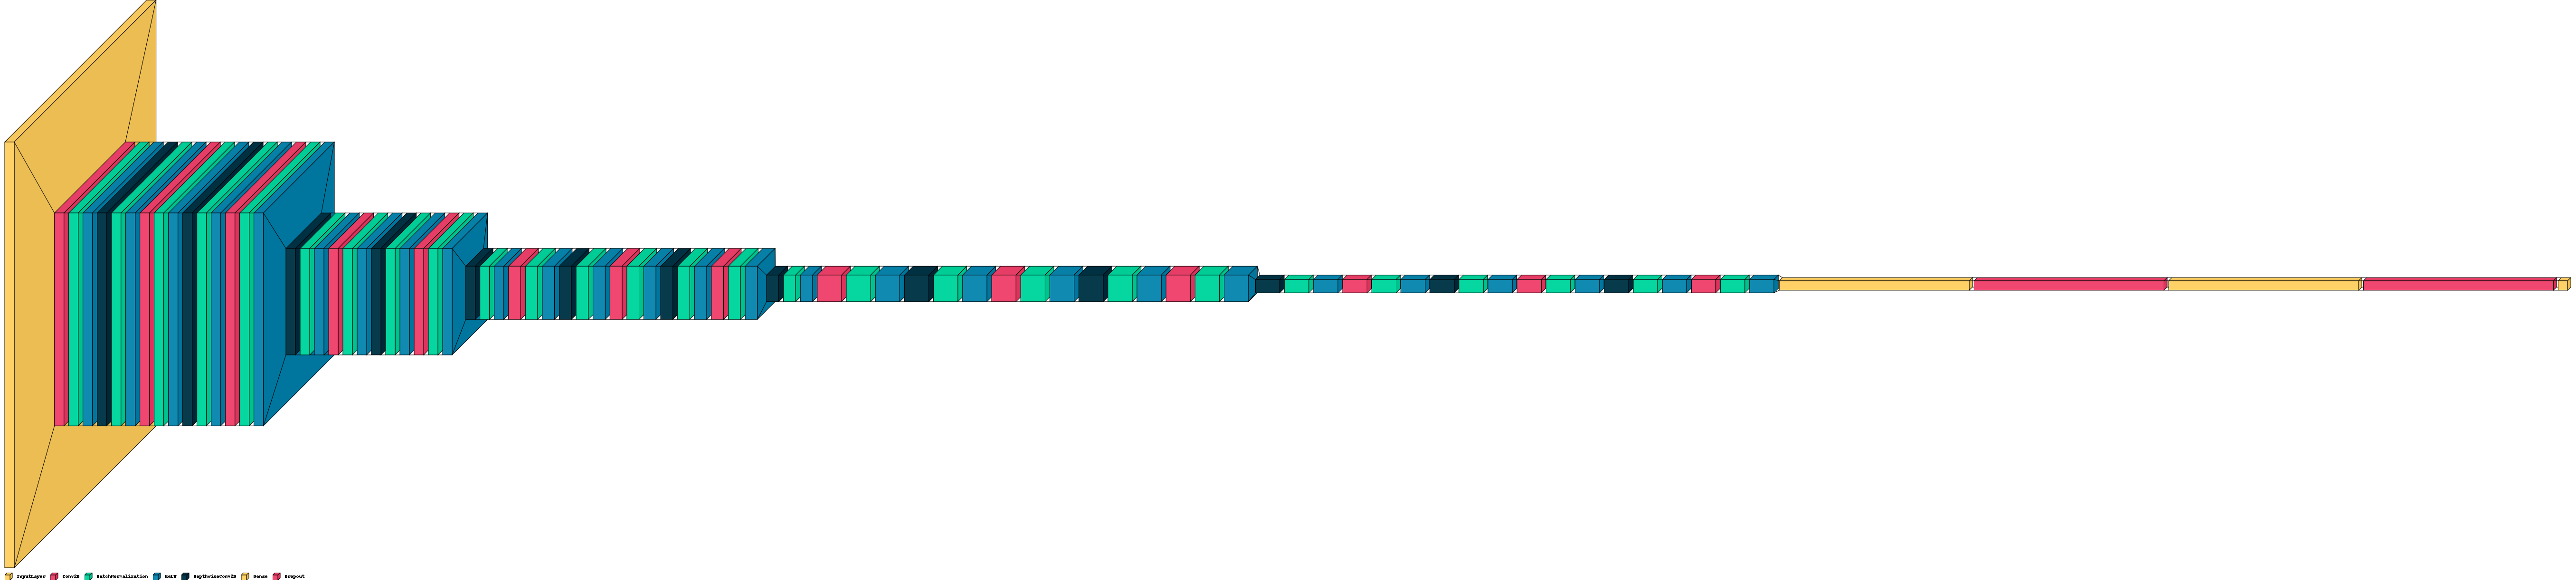

In [ ]:
from tensorflow.keras.layers import Input, DepthwiseConv2D, Conv2D, BatchNormalization, ReLU, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

input_shape = (224, 224, 3)
input = Input(shape=input_shape)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

x = mobilenet_block(x, filters=64, strides=1)
x = mobilenet_block(x, filters=64, strides=1)

x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)
x = mobilenet_block(x, filters=256, strides=1)

x = mobilenet_block(x, filters=512, strides=2)
x = mobilenet_block(x, filters=512, strides=1)
x = mobilenet_block(x, filters=512, strides=1)

x = mobilenet_block(x, filters=512, strides=2)
x = mobilenet_block(x, filters=512, strides=1)
x = mobilenet_block(x, filters=512, strides=1)


x = AveragePooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(units=2, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.summary()
import visualkeras

visualkeras.layered_view(model, type_ignore=[AveragePooling2D, Flatten], legend=True) 


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = r"/content/drive/MyDrive/image/"

In [ ]:
# Define the image size and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% train and 20% validation
)

# Load and split the dataset
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset of the data
)

valid_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset of the data
)

Found 2051 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [ ]:
# Create and compile the MobileNet model
model = MobileNet(input_shape=(img_width, img_height, 3), include_top=True, weights=None, classes=train_generator.num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Define the number of epochs
epochs = 30

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30
64/64 [==============================] - 365s 5s/step - loss: 0.6558 - accuracy: 0.6830 - val_loss: 1.1317 - val_accuracy: 0.4250
Epoch 2/30
64/64 [==============================] - 141s 2s/step - loss: 0.5807 - accuracy: 0.7236 - val_loss: 1.5701 - val_accuracy: 0.4250
Epoch 3/30
64/64 [==============================] - 142s 2s/step - loss: 0.5862 - accuracy: 0.7147 - val_loss: 2.3156 - val_accuracy: 0.4125
Epoch 4/30
64/64 [==============================] - 138s 2s/step - loss: 0.5433 - accuracy: 0.7405 - val_loss: 2.1011 - val_accuracy: 0.4208
Epoch 5/30
64/64 [==============================] - 141s 2s/step - loss: 0.5460 - accuracy: 0.7311 - val_loss: 2.0326 - val_accuracy: 0.4187
Epoch 6/30
64/64 [==============================] - 122s 2s/step - loss: 0.5288 - accuracy: 0.7405 - val_loss: 1.4626 - val_accuracy: 0.4125
Epoch 7/30
64/64 [==============================] - 123s 2s/step - loss: 0.5590 - accuracy: 0.7375 - val_loss: 1.1587 - val_accuracy: 0.4250
Epoch 8/30
64

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(valid_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16/16 [==============================] - 23s 1s/step - loss: 1.1344 - accuracy: 0.6986
Test Loss: 1.1344
Test Accuracy: 0.6986
